In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Salary_Data.csv")
print("First five rows:")
print(df.head())

First five rows:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
X = df[["YearsExperience"]].values
y = df[["Salary"]].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
y_train= scaler.fit_transform(y_train)
y_test= scaler.transform(y_test)

In [12]:
y_test

array([[ 1.38997327],
       [-0.22678133],
       [ 1.43254705],
       [ 0.3212159 ],
       [-0.35312815],
       [-0.61558808]])

In [20]:
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

In [21]:
print("\nTraining samples:", X_train.shape[0])


Training samples: 24


In [22]:
y_test

tensor([[ 1.3896],
        [-0.2268],
        [ 1.4326],
        [ 0.3213],
        [-0.3530],
        [-0.6157]])

In [23]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

In [24]:
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [25]:
criterion = nn.MSELoss()               # Mean Squared Error (cost function)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Gradient Descent optimizer

In [26]:
epochs = 300
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/300], Loss: 0.1094
Epoch [100/300], Loss: 0.0820
Epoch [150/300], Loss: 0.0648
Epoch [200/300], Loss: 0.0539
Epoch [250/300], Loss: 0.0471
Epoch [300/300], Loss: 0.0428


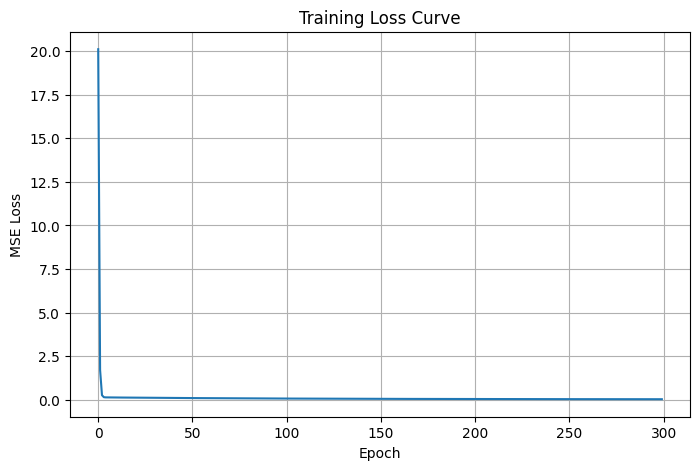

In [27]:
plt.figure(figsize=(8,5))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

In [28]:
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    print(f"Test MSE: {test_loss.item():.4f}")

Test MSE: 0.0630


In [29]:
for i in range(5):
    print(f"Predicted: {y_pred_test[i].item():.2f}, Actual: {y_test[i].item():.2f}")

Predicted: 1.43, Actual: 1.39
Predicted: -0.05, Actual: -0.23
Predicted: 0.99, Actual: 1.43
Predicted: 0.08, Actual: 0.32
Predicted: -0.59, Actual: -0.35


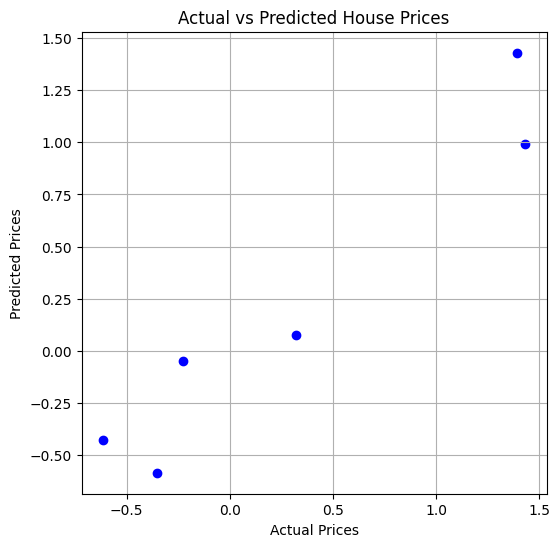

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(y_test.numpy(), y_pred_test.numpy(), color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()